In [2]:
from tmdbv3api import TMDb
from tmdbv3api import Movie
from tmdbv3api.exceptions import TMDbException
import random
import pandas as pd
import csv
import numpy as np
from math import exp
import ast
tmdb=TMDb()
tmdb.api_key='9cf68f4c97c8f0cc6bb9646da389a808'

In [3]:
# Initialize csv file paths
csv_file_path= 'data_with_holiday_and_cpi.csv'
# Create DataFrames from both CSV files
df = pd.read_csv(csv_file_path)

In [4]:
# Create a new column based on the condition
df['Has Star Score'] = np.where(df['Unweighted Star Score'] == 0, 0, 1)
df['Has Director Score'] = np.where(df['Total Director Score'] == 0, 0, 1)
df['Has Production Company Score'] = np.where(df['Total Production Company Score'] == 0, 0, 1)
df['Has Domestic Distributor Score'] = np.where(df['Domestic Distributor Score'] == 0, 0, 1)



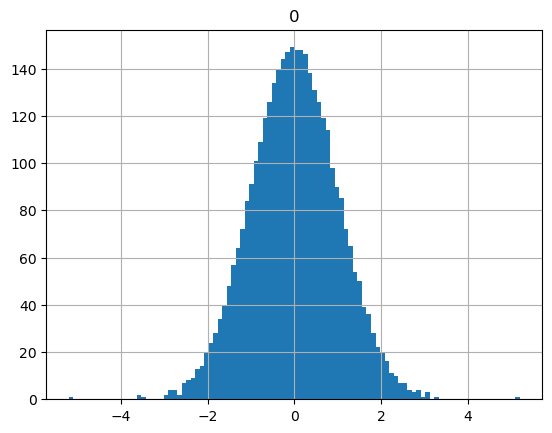

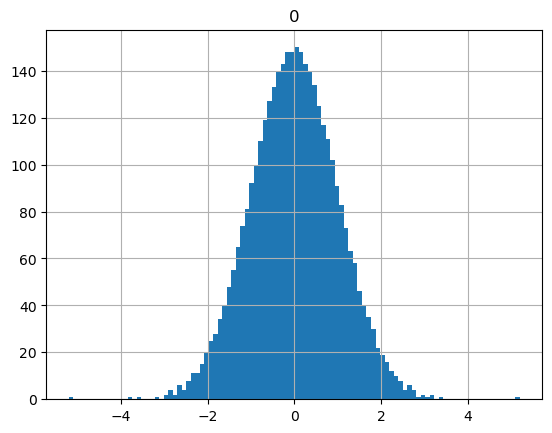

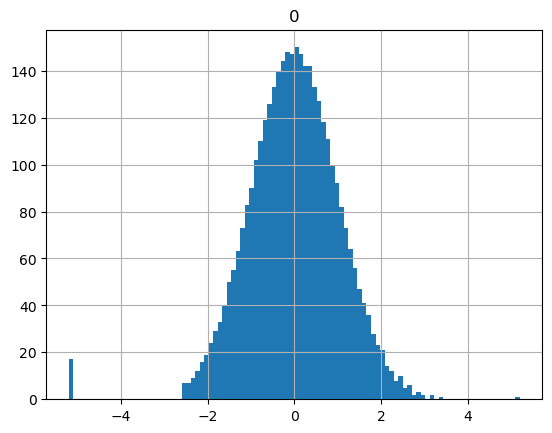

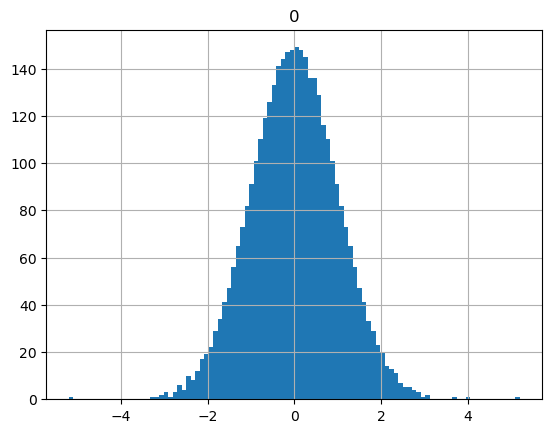

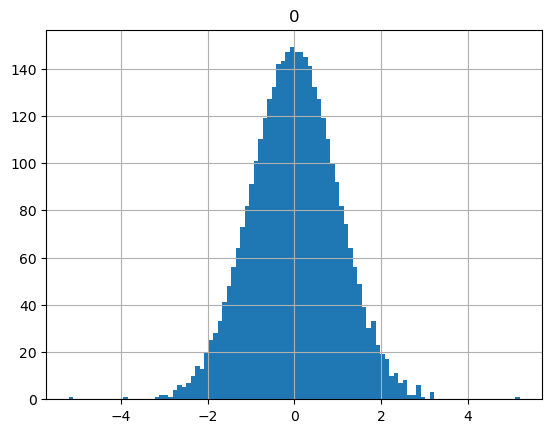

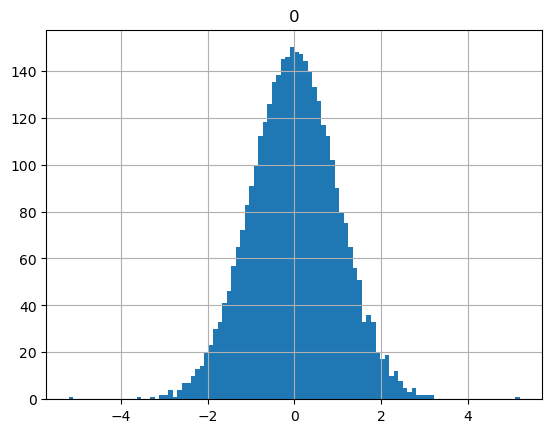

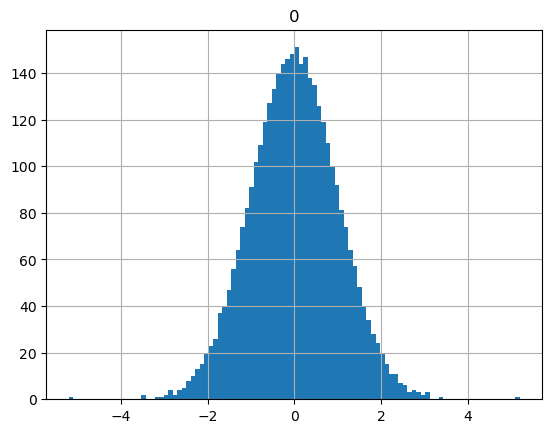

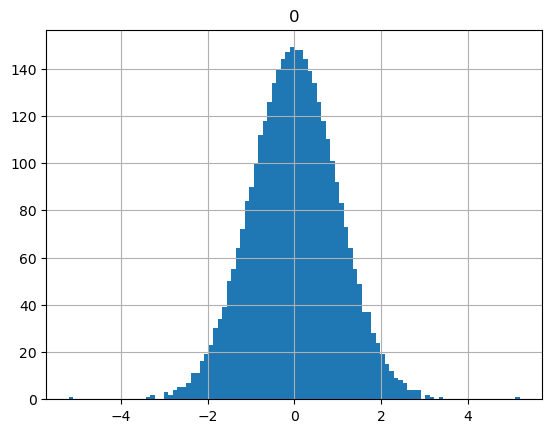

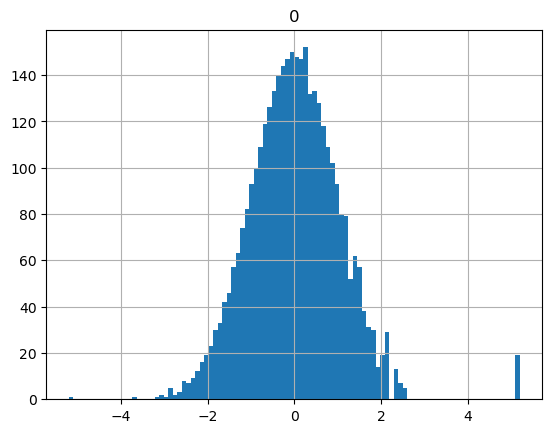

In [5]:
from sklearn.preprocessing import QuantileTransformer


columns_to_normalize = ['Unweighted Star Score', 'Simple Weight Star Score', 'Log Weight Star Score', 'Exponential Weight Star Score', 'Total Director Score', 'Avg Director Score', 'Total Production Company Score', 'Avg Production Company Score','Domestic Distributor Score']

for column in columns_to_normalize:
    # Define the range for the random noise
    noise_range = 1
    # Replace zero values with random noise within the specified range
    mask = (df[column] == 0)
    df.loc[mask, column] = np.random.uniform(low=0, high=noise_range, size=mask.sum())
    star_scores = df[column]
    qt = QuantileTransformer(output_distribution='normal')
    normalized_scores = qt.fit_transform(star_scores.values.reshape(-1, 1))
    normalized_scores_df = pd.DataFrame(normalized_scores)
    normalized_scores_df.hist(bins = 100)
    new_column_name = f'{column}_normalized'  # Create a new column name
    df[new_column_name] = normalized_scores_df

df.to_csv("final_unsplit_data.csv", index = False)